In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

Using TensorFlow backend.


## Load Dataset

In [2]:
df = pd.read_csv('data/AMZN (1).csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [19]:
df.shape

(5560, 7)

## Compute Mid-price 

In [4]:
high_prices = df['High'].values
low_prices = df['Low'].values
mid_prices = (high_prices + low_prices) / 2

## Create Windows

In [5]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

## Normalization of numerical values

In [6]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((4958, 50, 1), (551, 50, 1))

## Build a model

In [7]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 4958 samples, validate on 551 samples
Epoch 1/20
4958/4958 [==============================] - 59s 12ms/step - loss: 0.0102 - val_loss: 7.2920e-04
Epoch 2/20
4958/4958 [==============================] - 57s 12ms/step - loss: 0.0041 - val_loss: 5.2588e-04
Epoch 3/20
4958/4958 [==============================] - 57s 11ms/step - loss: 0.0029 - val_loss: 5.5516e-04
Epoch 4/20
4958/4958 [==============================] - 57s 12ms/step - loss: 0.0025 - val_loss: 4.6648e-04
Epoch 5/20
4958/4958 [==============================] - 57s 12ms/step - loss: 0.0024 - val_loss: 5.5485e-04
Epoch 6/20
4958/4958 [==============================] - 58s 12ms/step - loss: 0.0023 - val_loss: 3.5296e-04
Epoch 7/20
4958/4958 [==============================] - 55s 11ms/step - loss: 0.0022 - val_loss: 3.3452e-04
Epoch 8/20
4958/4958 [==============================] - 55s 11ms/step - loss: 0.0023 - val_loss: 3.0947e-04
Epoch 9/20
4958/4958 [==============================] - 59s 12ms/step - loss: 0.0022 - va

## Prediction

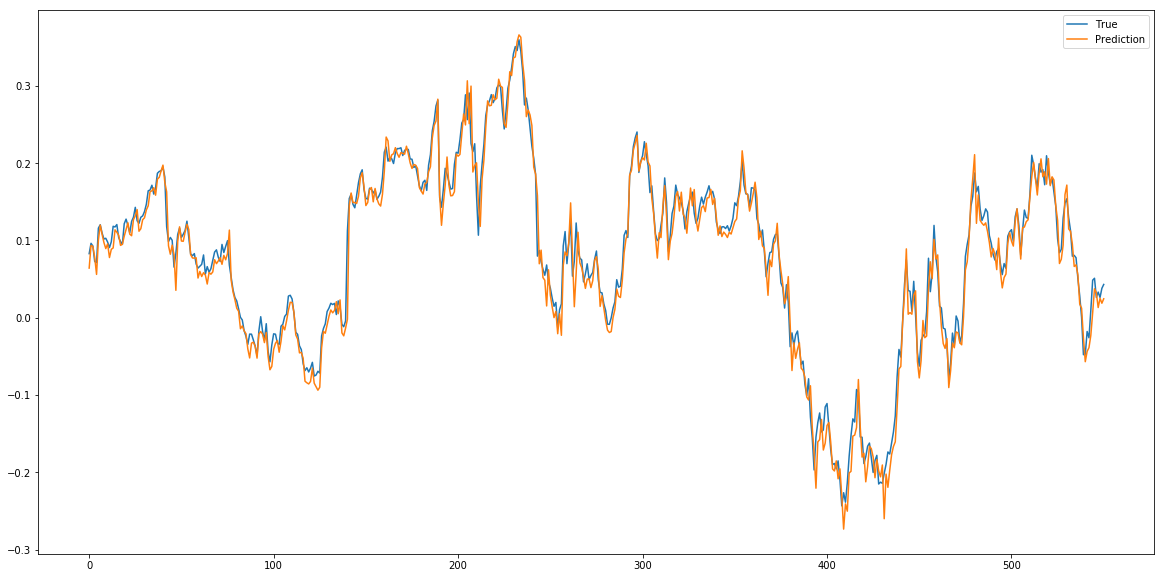

In [28]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()